In [1]:
# Importación de las librerías principales para el proyecto 

# Librerías básicas para manejo y visualización de datos 
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
# Librerías para imputación, features polinómicas y algunos modelos
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
# Librerías para modelos con información de summary
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
# Librería para hacer la combinación de columnas 
import itertools

In [2]:
# Lectura Inicial del Dataset y Shape 
data_inicial = pd.read_csv("./vehicles.csv")
data_inicial.shape

(509577, 25)

In [110]:
# Empezando la exploración con un poco de información resumida 
data_inicial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 509577 entries, 0 to 509576
Data columns (total 25 columns):
id              509577 non-null int64
url             509577 non-null object
region          509577 non-null object
region_url      509577 non-null object
price           509577 non-null int64
year            508050 non-null float64
manufacturer    486813 non-null object
model           501588 non-null object
condition       277643 non-null object
cylinders       309894 non-null object
fuel            505592 non-null object
odometer        417253 non-null float64
title_status    506515 non-null object
transmission    505858 non-null object
vin             302152 non-null object
drive           365434 non-null object
size            167574 non-null object
type            368046 non-null object
paint_color     344871 non-null object
image_url       509563 non-null object
description     509561 non-null object
county          0 non-null float64
state           509577 non-null obj

In [111]:
# El dataset es demasiado grande, se eligirá un estado específico 
# A continuación se pueden ver los estados con mayor ocurrencias 

estados = data_inicial['state'].value_counts()
estados[estados > 20000]

ca    52780
fl    35244
tx    29589
ny    22473
mi    21044
Name: state, dtype: int64

In [112]:
# Seleccion de Florida 

data_continuar = data_inicial[data_inicial['state'] == 'fl']
data_continuar.shape

(35244, 25)

In [113]:
# Comenzar con verificar la cantidad de nulos por columnas y comenzar con la limpieza 
# Hay algunas columnas que tienen hasta 50% de datos nulos, estas se eliminarán

data_continuar.isna().sum()

id                  0
url                 0
region              0
region_url          0
price               0
year              147
manufacturer     1898
model             414
condition       14299
cylinders       13708
fuel              302
odometer         7866
title_status      192
transmission      266
vin             15241
drive           10667
size            21435
type             8666
paint_color     10353
image_url           2
description         2
county          35244
state               0
lat               124
long              124
dtype: int64

In [114]:
# Eliminar columnas con altos porcentajes de nulos 
data_continuar.drop(['county', 'image_url', 'description',
                    'size', 'vin'],1,inplace=True)

# Eliminar horizontalmente de columnas con poco porcentaje de nulos 
data_continuar.dropna(subset=['year','fuel','title_status','manufacturer',
                             'model', 'transmission', 'lat', 'long','condition'], inplace=True)

d:\cs7\machine learning models\mlenv\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
d:\cs7\machine learning models\mlenv\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [115]:
# Función para utilizar el simple imputer para las columnas faltantes 
# Se utilizará el método de Most frequent para las categóricas y el de mean para la numérica 

def impute(column, tipo):
    imp = SimpleImputer(missing_values=np.nan, strategy=tipo)
    col = data_continuar[column]
    col = np.expand_dims(col, axis=1)
    col = imp.fit_transform(col)
    # quitar y poner el nuevo de cylinders 
    data_continuar.drop([column], 1, inplace=True)
    data_continuar[column] = col

In [116]:
impute('cylinders', 'most_frequent')
impute('paint_color', 'most_frequent')
impute('type', 'most_frequent')
impute('odometer', 'mean')
impute('drive', 'most_frequent')

d:\cs7\machine learning models\mlenv\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
d:\cs7\machine learning models\mlenv\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
d:\cs7\machine learning models\mlenv\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-d

In [117]:
# Todos los nulos se han tratado! 

data_continuar.isna().sum().sum()

0

In [118]:
data_continuar.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,fuel,title_status,transmission,state,lat,long,cylinders,paint_color,type,odometer,drive
77712,7042151517,https://panamacity.craigslist.org/ctd/d/leeds-...,panama city,https://panamacity.craigslist.org,16950,2012.0,audi,q7 tdi,excellent,diesel,clean,automatic,fl,33.5283,-86.5748,6 cylinders,grey,sedan,80000.000000,fwd
149214,7034090424,https://gainesville.craigslist.org/ctd/d/gaine...,gainesville,https://gainesville.craigslist.org,1000,2007.0,ford,f-150,excellent,gas,clean,automatic,fl,29.7708,-82.2832,8 cylinders,white,sedan,99181.561466,fwd
149397,7033463134,https://gainesville.craigslist.org/ctd/d/gaine...,gainesville,https://gainesville.craigslist.org,999,2011.0,cadillac,srx,excellent,gas,clean,automatic,fl,29.7708,-82.2832,6 cylinders,white,SUV,99181.561466,4wd
152301,7049745068,https://ocala.craigslist.org/cto/d/fruitland-p...,ocala,https://ocala.craigslist.org,4500,2003.0,toyota,camry,good,gas,clean,automatic,fl,28.8639,-81.8998,4 cylinders,black,sedan,190000.000000,4wd
153888,7043448309,https://ocala.craigslist.org/ctd/d/longwood-20...,ocala,https://ocala.craigslist.org,5250,2009.0,mercury,mariner,excellent,gas,clean,automatic,fl,28.7140,-81.3256,6 cylinders,white,sedan,108083.000000,fwd


In [119]:
insignificante = ['id', 'url', 'region_url', 'lat', 'long']
data_continuar.drop(insignificante, 1, inplace=True)

In [120]:
data_preliminar = data_continuar.copy()

In [121]:
data_preliminar.head()

,region,price,year,manufacturer,model,condition,fuel,title_status,transmission,state,cylinders,paint_color,type,odometer,drive
77712,panama city,16950,2012.0,audi,q7 tdi,excellent,diesel,clean,automatic,fl,6 cylinders,grey,sedan,80000.000000,fwd
149214,gainesville,1000,2007.0,ford,f-150,excellent,gas,clean,automatic,fl,8 cylinders,white,sedan,99181.561466,fwd
149397,gainesville,999,2011.0,cadillac,srx,excellent,gas,clean,automatic,fl,6 cylinders,white,SUV,99181.561466,4wd
152301,ocala,4500,2003.0,toyota,camry,good,gas,clean,automatic,fl,4 cylinders,black,sedan,190000.000000,4wd
153888,ocala,5250,2009.0,mercury,mariner,excellent,gas,clean,automatic,fl,6 cylinders,white,sedan,108083.000000,fwd


In [122]:
# Un poco de tratamiento para columnas categóricas que se pueden convertir en ordinales 

# Esta funcion realiza ese reemplazo para convertirlas en columnas numéricas
def replace_ordinal(orden, columna, reemplazo=None):
    for i in range(len(orden)):
        mask = data_preliminar[columna] == orden[i]
        if reemplazo is not None:
            data_preliminar.loc[mask,columna] = reemplazo[i]
        else:
            data_preliminar.loc[mask,columna] = i + 1 

In [123]:
# Realizar el reemplazo de la columna de condition 

orden = ['salvage', 'fair', 'good', 'excellent', 'like new', 'new']
colu = 'condition'
replace_ordinal(orden, colu, None)

In [124]:
# Realizar el reemplazo de la columna de cylinders 

orden = ['other', '3 cylinders', '4 cylinders', '5 cylinders',
        '6 cylinders', '8 cylinders', '10 cylinders', '12 cylinders']
reemplazo = [1,3,4,5,6,8,10,12]
columna = 'cylinders'
replace_ordinal(orden, columna, reemplazo)

In [125]:
# Realizar el reemplazo de la columna de transmission 
# Posteriormente no se utilizó esta columna por tipo de información recolectada 

orden = ['other','manual', 'automatic']
columna = 'transmission'
replace_ordinal(orden, columna, None)

In [126]:
# El análisis general se realizará en base a la información numérica 
# Ahorita se extrae lo necesario para continuar 

nume = ['price', 'year', 'condition', 'cylinders', 'odometer']
data_numerica = data_preliminar.copy()
data_numerica = data_numerica[nume]

In [127]:
pd.to_numeric(data_numerica['cylinders'])
data_numerica.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19527 entries, 77712 to 189866
Data columns (total 5 columns):
price        19527 non-null int64
year         19527 non-null float64
condition    19527 non-null int64
cylinders    19527 non-null int64
odometer     19527 non-null float64
dtypes: float64(2), int64(3)
memory usage: 915.3 KB


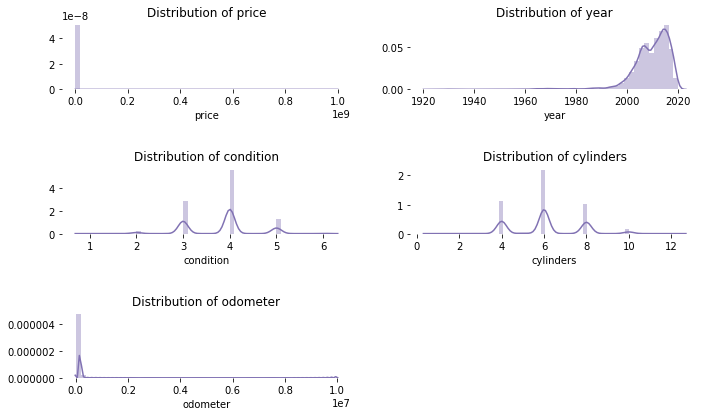

In [130]:
# Loop para graficar distribución de cada una de las variables 
sns.set_color_codes()
axis = []
cont = 1
fig = plt.figure(figsize=(10,10))
for i in data_numerica:
    axtemp = fig.add_subplot(5,2,cont)
    axtemp.spines['top'].set_visible(False)
    axtemp.spines['right'].set_visible(False)
    axtemp.spines['bottom'].set_visible(False)
    axtemp.spines['left'].set_visible(False)
    fig.tight_layout(pad=3.0)
    sns.distplot(data_numerica[i], color='m')
    plt.title("Distribution of " + i)
    cont += 1

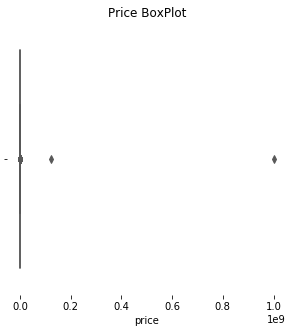

In [131]:
# Claramente tenemos problemas con falta de normalidad y outliers 
# Se comenzará a tratar el tema de los outliers 

fig, axtemp = plt.subplots(figsize=(5,5))
axtemp.spines['top'].set_visible(False)
axtemp.spines['right'].set_visible(False)
axtemp.spines['bottom'].set_visible(False)
axtemp.spines['left'].set_visible(False)
sns.boxplot(data_numerica['price'], color='m')
plt.title("Price BoxPlot")
plt.show()
# Estos outliers son errores, no tienen sentido 

In [132]:
# Eliminar los valores outliers 

data_numerica = data_numerica[data_numerica['price'] < 30000]
data_numerica = data_numerica[data_numerica['price'] > 200]

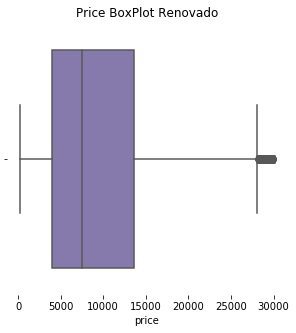

In [133]:
# Visualizar price nuevamente 

fig, axtemp = plt.subplots(figsize=(5,5))
axtemp.spines['top'].set_visible(False)
axtemp.spines['right'].set_visible(False)
axtemp.spines['bottom'].set_visible(False)
axtemp.spines['left'].set_visible(False)
sns.boxplot(data_numerica['price'], color='m')
plt.title("Price BoxPlot Renovado")
plt.show()

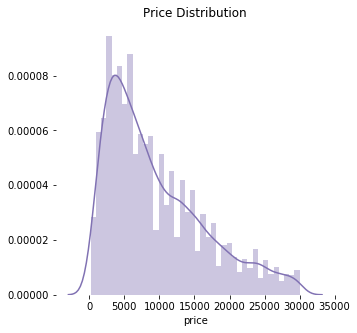

In [134]:
# La distribucion mejoro, sin embarjo todavia no se puede decir que esta normalizada
fig, axtemp = plt.subplots(figsize=(5,5))
axtemp.spines['top'].set_visible(False)
axtemp.spines['right'].set_visible(False)
axtemp.spines['bottom'].set_visible(False)
axtemp.spines['left'].set_visible(False)
sns.distplot(data_numerica['price'], color='m')
plt.title("Price Distribution")
plt.show()

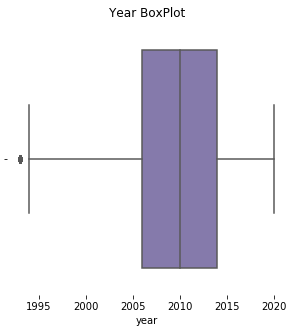

In [135]:
data_numerica = data_numerica[data_numerica['year'] > 1992]

fig, axtemp = plt.subplots(figsize=(5,5))
axtemp.spines['top'].set_visible(False)
axtemp.spines['right'].set_visible(False)
axtemp.spines['bottom'].set_visible(False)
axtemp.spines['left'].set_visible(False)
sns.boxplot(data_numerica['year'], color='m')
plt.title("Year BoxPlot")
plt.show()

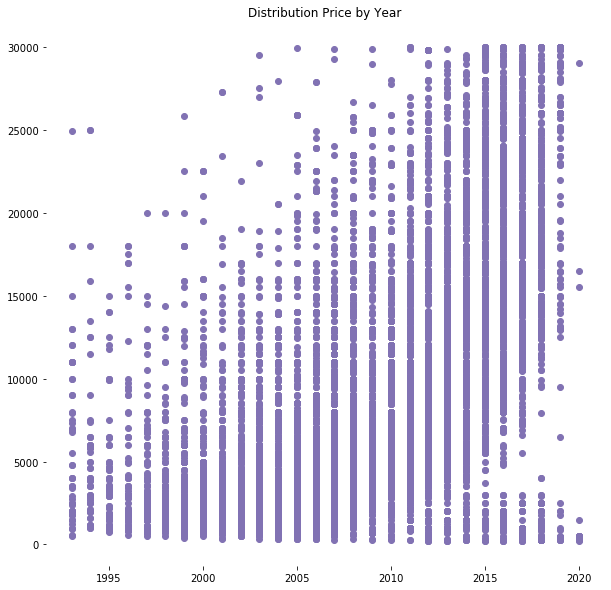

In [136]:
fig, axtemp = plt.subplots(figsize=(10,10))
axtemp.spines['top'].set_visible(False)
axtemp.spines['right'].set_visible(False)
axtemp.spines['bottom'].set_visible(False)
axtemp.spines['left'].set_visible(False)
plt.scatter(data_numerica['year'], data_numerica['price'], c='m')
plt.title("Distribution Price by Year")
plt.show()

In [137]:
# Eliminar a los outliers de odometer, tambien tiene valores ridiculos 
# Muchos de estos son posibles errores

data_numerica = data_numerica[data_numerica['odometer'] < 250000]

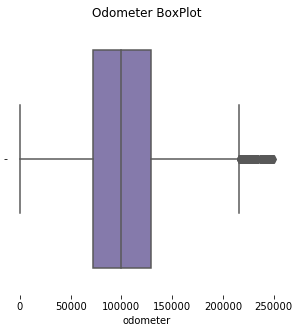

In [138]:
fig, axtemp = plt.subplots(figsize=(5,5))
axtemp.spines['top'].set_visible(False)
axtemp.spines['right'].set_visible(False)
axtemp.spines['bottom'].set_visible(False)
axtemp.spines['left'].set_visible(False)
sns.boxplot(data_numerica['odometer'], color='m')
plt.title("Odometer BoxPlot")
plt.show()

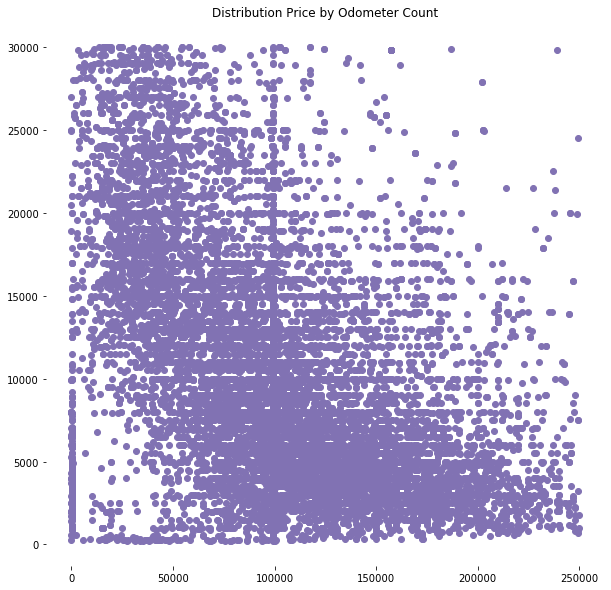

In [139]:
fig, axtemp = plt.subplots(figsize=(10,10))
axtemp.spines['top'].set_visible(False)
axtemp.spines['right'].set_visible(False)
axtemp.spines['bottom'].set_visible(False)
axtemp.spines['left'].set_visible(False)
plt.scatter(data_numerica['odometer'], data_numerica['price'], c='m')
plt.title("Distribution Price by Odometer Count")
plt.show()

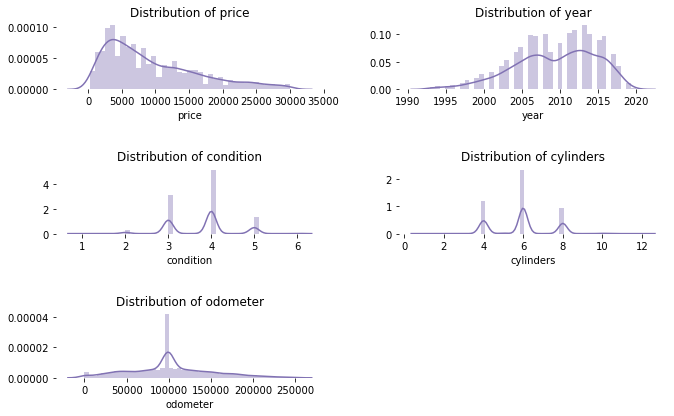

In [140]:
# Loop para graficar distribución de cada una de las variables 
sns.set_color_codes()
axis = []
cont = 1
fig = plt.figure(figsize=(10,10))
for i in data_numerica:
    axtemp = fig.add_subplot(5,2,cont)
    axtemp.spines['top'].set_visible(False)
    axtemp.spines['right'].set_visible(False)
    axtemp.spines['bottom'].set_visible(False)
    axtemp.spines['left'].set_visible(False)
    fig.tight_layout(pad=3.0)
    sns.distplot(data_numerica[i], color='m')
    plt.title("Distribution of " + i)
    cont += 1

[]

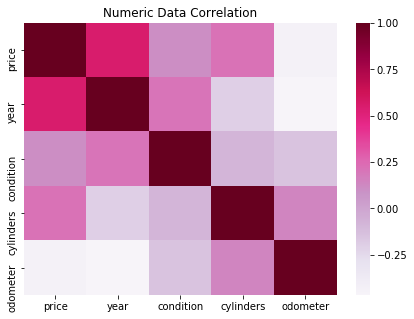

In [145]:
fig = plt.figure(figsize=(7,5))
corre = data_numerica.corr()
sns.heatmap(corre, cmap="PuRd")
plt.title("Numeric Data Correlation")
plt.plot()

In [146]:
# Para este punto todas las transformaciones iniciales estan listas 
# Sin embargo, todavia falta normalizar la informacion para beneficiar a los algoritmos 

data_normal = data_numerica.copy()

variables = ['price', 'year', 'condition', 'cylinders', 'odometer']
features = data_normal.values.astype(float)
min_max_scaler = preprocessing.MinMaxScaler()
features_n = min_max_scaler.fit_transform(features)
data = pd.DataFrame(features_n, columns=variables)

In [147]:
# Realizar Separación del Test y Train Set 

xs = ['year', 'condition', 'cylinders', 'odometer']
x_train, x_test, y_train, y_test = train_test_split(data[xs], data['price'], test_size=0.20, random_state=42)

In [148]:
# Comenzar con las Regresiones Lineales Simples 

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.310
Model:                            OLS   Adj. R-squared:                  0.310
Method:                 Least Squares   F-statistic:                     5521.
Date:                Tue, 10 Mar 2020   Prob (F-statistic):               0.00
Time:                        03:10:34   Log-Likelihood:                 2656.3
No. Observations:               12279   AIC:                            -5309.
Df Residuals:                   12277   BIC:                            -5294.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0818      0.006    -14.624      0.0

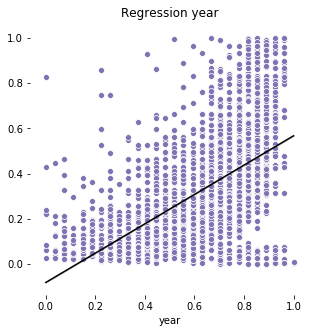

In [151]:
# Funcion que aplica modelo y grafica resultado en conjunto con el summary
def simple_model(column):
    X = sm.add_constant(x_train[column])
    simple_model = sm.OLS(y_train, X)
    simple_result = simple_model.fit();
    print(simple_result.summary())

    # Plot 
    fig, axtemp = plt.subplots(figsize=(5,5))
    axtemp.spines['top'].set_visible(False)
    axtemp.spines['right'].set_visible(False)
    axtemp.spines['bottom'].set_visible(False)
    axtemp.spines['left'].set_visible(False)
    y_pred_simple = simple_result.predict(sm.add_constant(x_test[column]))
    sns.scatterplot(x = x_test[column], y = y_test.values.ravel(), color='m')
    sns.lineplot(x = x_test[column] , y = y_pred_simple, color='black')
    plt.title("Regression " + column)
    plt.show()

simple_model('year')

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     149.8
Date:                Tue, 10 Mar 2020   Prob (F-statistic):           3.02e-34
Time:                        02:27:13   Log-Likelihood:                 450.76
No. Observations:               12279   AIC:                            -897.5
Df Residuals:                   12277   BIC:                            -882.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2151      0.008     26.106      0.0

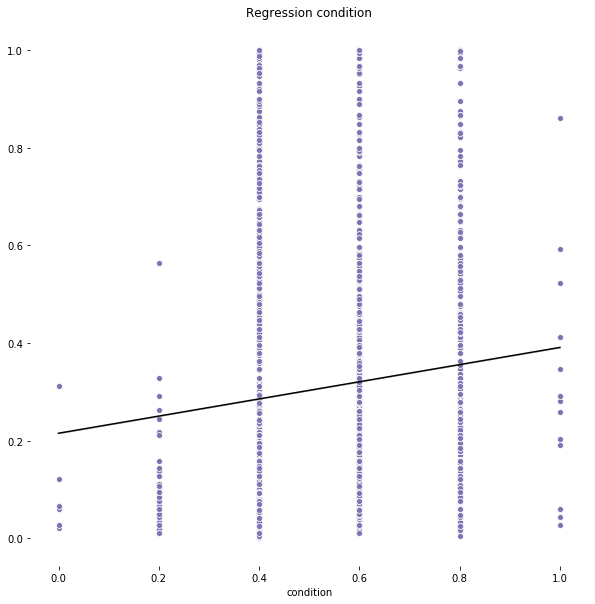

In [81]:
simple_model('condition')

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     624.5
Date:                Tue, 10 Mar 2020   Prob (F-statistic):          1.72e-134
Time:                        02:27:15   Log-Likelihood:                 680.93
No. Observations:               12279   AIC:                            -1358.
Df Residuals:                   12277   BIC:                            -1343.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1338      0.007     17.971      0.0

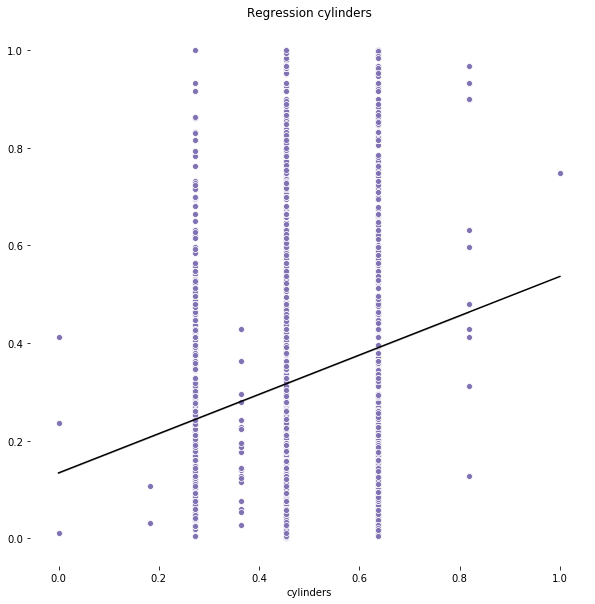

In [82]:
simple_model('cylinders')

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.190
Model:                            OLS   Adj. R-squared:                  0.190
Method:                 Least Squares   F-statistic:                     2884.
Date:                Tue, 10 Mar 2020   Prob (F-statistic):               0.00
Time:                        03:12:05   Log-Likelihood:                 1671.7
No. Observations:               12279   AIC:                            -3339.
Df Residuals:                   12277   BIC:                            -3325.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5256      0.004    119.449      0.0

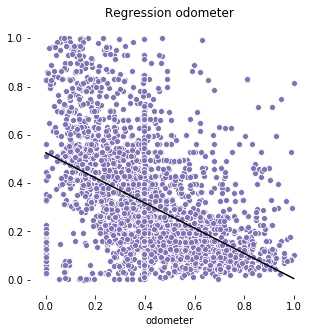

In [152]:
simple_model('odometer')

In [85]:
# ANALISIS DE MULTIPLES VARIABLES 

# En el siguiente fragmento de codigo se encuentran todas las combinaciones de multiples variables 
# Para el modelo sobre diferentes columnas, posteriormente se pasa el modeo y se encuentran los resultados 

variables = ['year','condition','cylinders','odometer']

test1 = list(itertools.combinations(variables, 4))
test2 = list(itertools.combinations(variables, 3))
test3 = list(itertools.combinations(variables, 2))
total = test1 + test2 + test3
print(total)

resultados = []

for i in total:
    multiple_model = sm.OLS(y_train, sm.add_constant(x_train[list(i)]))
    multiple_result = multiple_model.fit()
    resultados.append(multiple_result)

[('year', 'condition', 'cylinders', 'odometer'), ('year', 'condition', 'cylinders'), ('year', 'condition', 'odometer'), ('year', 'cylinders', 'odometer'), ('condition', 'cylinders', 'odometer'), ('year', 'condition'), ('year', 'cylinders'), ('year', 'odometer'), ('condition', 'cylinders'), ('condition', 'odometer'), ('cylinders', 'odometer')]


In [86]:
for i in resultados:
    print(i.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.475
Model:                            OLS   Adj. R-squared:                  0.474
Method:                 Least Squares   F-statistic:                     2772.
Date:                Tue, 10 Mar 2020   Prob (F-statistic):               0.00
Time:                        02:29:12   Log-Likelihood:                 4328.1
No. Observations:               12279   AIC:                            -8646.
Df Residuals:                   12274   BIC:                            -8609.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2142      0.011    -19.102      0.0

In [89]:
# El ganador a la prueba anterior fue el siguiente 

ganador = ['year', 'cylinders', 'odometer']

In [97]:
# Aplicar features polinomicas para ver si se puede mejorar aun 

poly = PolynomialFeatures(2)
poly_train = poly.fit_transform(x_train[ganador])
poly_test = poly.fit_transform(x_test[ganador])

Text(0.5, 1.0, 'Year to Price Polynomic')

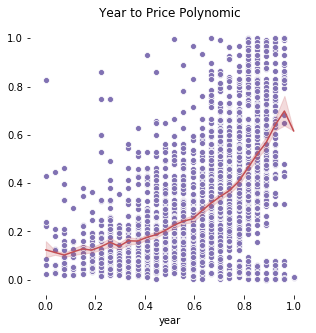

In [153]:
poly_model = LinearRegression()
poly_result = poly_model.fit(poly_train, y_train)
y_poly_pred = poly_model.predict(poly_test)
fig, axtemp = plt.subplots(figsize=(5,5))
axtemp.spines['top'].set_visible(False)
axtemp.spines['right'].set_visible(False)
axtemp.spines['bottom'].set_visible(False)
axtemp.spines['left'].set_visible(False)
sns.scatterplot(x = x_test['year'], y = y_test.values.ravel(), color='m')
sns.lineplot(x = x_test['year'] , y = y_poly_pred.ravel(),color='r');
plt.title("Year to Price Polynomic")

In [109]:
# Resultados finales con features polinomicas 
poly_model = sm.OLS(y_train, poly_train)
poly_result = poly_model.fit()
print(poly_result.summary())
print(poly_model.score(poly_test, y_test))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.519
Model:                            OLS   Adj. R-squared:                  0.519
Method:                 Least Squares   F-statistic:                     1473.
Date:                Tue, 10 Mar 2020   Prob (F-statistic):               0.00
Time:                        02:51:26   Log-Likelihood:                 4873.7
No. Observations:               12279   AIC:                            -9727.
Df Residuals:                   12269   BIC:                            -9653.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1648      0.037      4.403      0.0

ValueError: shapes (10,10) and (3070,10) not aligned: 10 (dim 1) != 3070 (dim 0)

In [101]:
from sklearn.linear_model import Ridge

In [105]:
rng = np.random.RandomState(0)
clf = Ridge(alpha=10)
clf.fit(x_train, y_train)
print(clf.score(x_test, y_test))

0.4493102683929265
